In [1]:
# !pip install selenium
# !pip install bs4
# chromedriver download link : https://chromedriver.chromium.org/downloads

In [2]:
import requests
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
# 확인하고 싶은 아이디 입력
summoner_name = 'bbo bbo'

In [4]:
# 확인하고 싶은 자료 선정
Damage = []
CS = []
Tower = []
Wardplaced = []
visionWardplaced = []
WardKilled = []
Kill = []
Death = []
Assist = []
Level = []
Gold = []
#
Gamelength = []

In [5]:
# selenium을 백그라운드로 실행하기 위해 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1920x1080')

In [6]:
# selenium으로 실행시킬 url설정
summoner_url = 'https://poro.gg/summoner/kr/' + summoner_name
chrome_driver_path = "C:/Users/Brena-30/Downloads/[opgg데이터분석가]/chromedriver"
driver = webdriver.Chrome(chrome_driver_path)

driver.get(summoner_url)

<ipython-input-6-b013d6db90aa>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_driver_path)


In [7]:
# 솔로랭크의 자료만을 원하므로, 솔로랭크 버튼 클릭
solo_rank_button = driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(1) > div.summoner-box__content > div > div.match-history-filter__queue-types > button:nth-child(2)")
solo_rank_button.click()
time.sleep(2)

<ipython-input-7-0c252052034b>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  solo_rank_button = driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(1) > div.summoner-box__content > div > div.match-history-filter__queue-types > button:nth-child(2)")


In [8]:
# 더보기 버튼을 눌러야 한다면 이 코드를 쓰세요


# click_count = 0
# while True:
# #     if click_count == 3:
# #         break 
        
#     try:   
#         #더보기 클릭
#         driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > button").click()
#         time.sleep(1)
#         click_count += 1

#     except Exception as e:
#         pass
#         break

In [9]:
# 컨테이너의 정보들은, start가 3부터 시작해서, 1씩 더해지며 쌓인다.
# 각 컨테이너 마다 (+) 버튼 눌러주는 코드
start = 3
while True:
    try:
        driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(" + str(start) + ") > div > div.match-history__expand-toggle").click()
        time.sleep(0.5)
        start += 1
    
    except Exception as e:
        pass
        break

<ipython-input-9-f5ee5972c586>:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(" + str(start) + ") > div > div.match-history__expand-toggle").click()


In [10]:
# 전체 펼친 html
summoner_html = driver.page_source
summoner_soup = BeautifulSoup(summoner_html, 'html.parser')

In [11]:
driver.quit()

In [12]:
summoner_games_html = summoner_soup.select('div.match-history__content')

In [13]:
# 불러오는 게임의 수
# games_len = len(summoner_games_html)
games_len = 13

In [14]:
# 각각의 정보들을 각 리스트에 담아준다.
for i in range(games_len):
    Level.append(int(list(summoner_games_html[i].select_one('div.champion').stripped_strings)[0]))
    CS.append(int(list(summoner_games_html[i].select_one('div.info').stripped_strings)[3]))
    Kill.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[0]))
    Death.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[2]))
    Assist.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[4]))
    Wardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[1]))
    visionWardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[0]))
    WardKilled.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[2]))
    
    #
    gl = list(summoner_games_html[i].select_one('span.mt-md-1'))[0].split(':')
    Gamelength.append(int(gl[0])*60 + int(gl[1]))

In [15]:
Gamelength 

[1104, 1618, 1476, 1903, 1532, 1939, 1824, 1422, 1456, 1766, 1858, 1800, 2340]

In [16]:
# 게임의 결과가 승리인지 패배인지 알려주는 html
# 각 게임의 '자세히보기' 버튼을 눌러야 나오는 정보들을 담는 코드

for i in range(games_len):
    summoner_games_html = summoner_soup.select('div.match-history__result')
    if list(summoner_games_html[i].stripped_strings)[0] == '패배':
        summoner_games_html = summoner_soup.select('div.match-history-detail__content')
        selector1 = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        selector2 = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
    elif list(summoner_games_html[i].stripped_strings)[0] == '승리':
        summoner_games_html = summoner_soup.select('div.match-history-detail__content')
        selector1 = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        selector2 = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
        
    gold = list(summoner_games_html[i].select_one(selector1).stripped_strings)[0]
    damage = list(summoner_games_html[i].select_one(selector2).stripped_strings)[0]
    if gold[-1] == '천':
        g = float(gold[:-1])
        g = int(g * 1000)
        Gold.append(g)
        
    elif gold[-1] == '만':
        g = float(gold[:-1])
        g = int(g * 10000)
        Gold.append(g)
        
    if ',' in damage:
        damage = damage.replace(',', '')
        damage = int(damage)
        Damage.append(damage)
    
    time.sleep(0.5)

In [17]:
# 내 평균 데이터들을 구하는 코드
# 각 데이터의 합을 (60/게임시간) 즉, 분으로 나누어서 나타낸다.

my_average_cs = round((sum(CS) * 60) / (sum(Gamelength)), 3)
my_average_kill = round((sum(Kill) * 60) / (sum(Gamelength)), 3)
my_average_death = round((sum(Death) * 60) / (sum(Gamelength)), 3)
my_average_Assist = round((sum(Assist) * 60) / (sum(Gamelength)), 3)
my_level = round((sum(Level) * 60) / (sum(Gamelength)), 3)
my_wardplaced = round((sum(Wardplaced) * 60) / (sum(Gamelength)), 3)
my_visionWardplaced = round((sum(visionWardplaced) * 60) / (sum(Gamelength)), 3)
my_wardkilled = round((sum(WardKilled) * 60) / (sum(Gamelength)), 3)
my_gold = round((sum(Gold) * 60) / (sum(Gamelength)), 3)
my_damage = round((sum(Damage) * 60) / (sum(Gamelength)), 3)

dataindex = ["Level", "CS", "Kill", "Death", "Assist", "wardPlaced", 
             "visionwardPlaced", "wardkilled", "Gold", "Damage"]
mydatacol = [my_level, my_average_cs, my_average_kill, my_average_death, 
                   my_average_Assist, my_wardplaced, my_visionWardplaced, my_wardkilled,
                  my_gold, my_damage]

In [36]:
# 데이터 프레임으로 그 정보들을 확인한다.
mydata = pd.DataFrame(mydatacol, index = dataindex).T
mydata.index = ['me']
mydata

,Level,CS,Kill,Death,Assist,wardPlaced,visionwardPlaced,wardkilled,Gold,Damage
me,0.504,5.393,0.256,0.185,0.351,0.319,0.185,0.15,423.36,702.927


In [19]:
# READ DATA
data = pd.read_csv("C:/Users/Brena-30/Downloads/[opgg데이터분석가]/BIPA_data.csv", index_col = 0)

# 다시하기 게임, 게임 길이가 10분 미만인 게임(오픈) 제외
data = data[data['gameLength'] >= 600]


#원하는 데이터
want_data = ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced',
             'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']
data = data[want_data]

In [48]:
data

,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,10,15,4,1,5,5,1,1,6083,5590,972
1,8,7,1,3,3,6,3,3,4118,3827,972
2,11,100,5,1,5,7,4,5,6769,9467,972
3,11,115,8,2,1,5,1,0,7972,10963,972
4,10,110,3,2,9,5,1,2,7552,6465,972
...,...,...,...,...,...,...,...,...,...,...,...
999995,15,29,1,11,7,29,4,7,8451,10019,2379
999996,18,251,10,6,3,8,0,1,18291,37581,2379
999997,17,40,5,5,22,13,3,2,12986,20994,2379
999998,17,260,6,5,3,11,1,4,15674,37078,2379


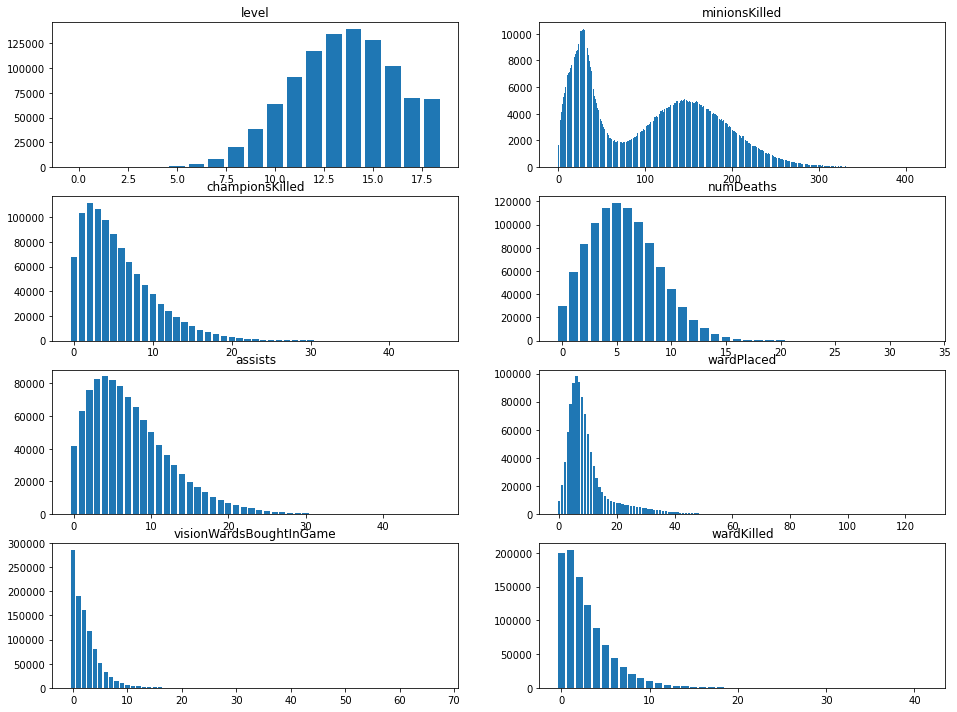

In [20]:
ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = data[col]
    d_len = len(d.unique())
    d_num = [0 for i in range(d_len+1)]

    for i in range(d_len+1):
      d_num[i]=len(d[d==i])

    num = range(d_len+1)
    plt.bar(num, d_num)
    ind += 1

<BarContainer object of 22308 artists>

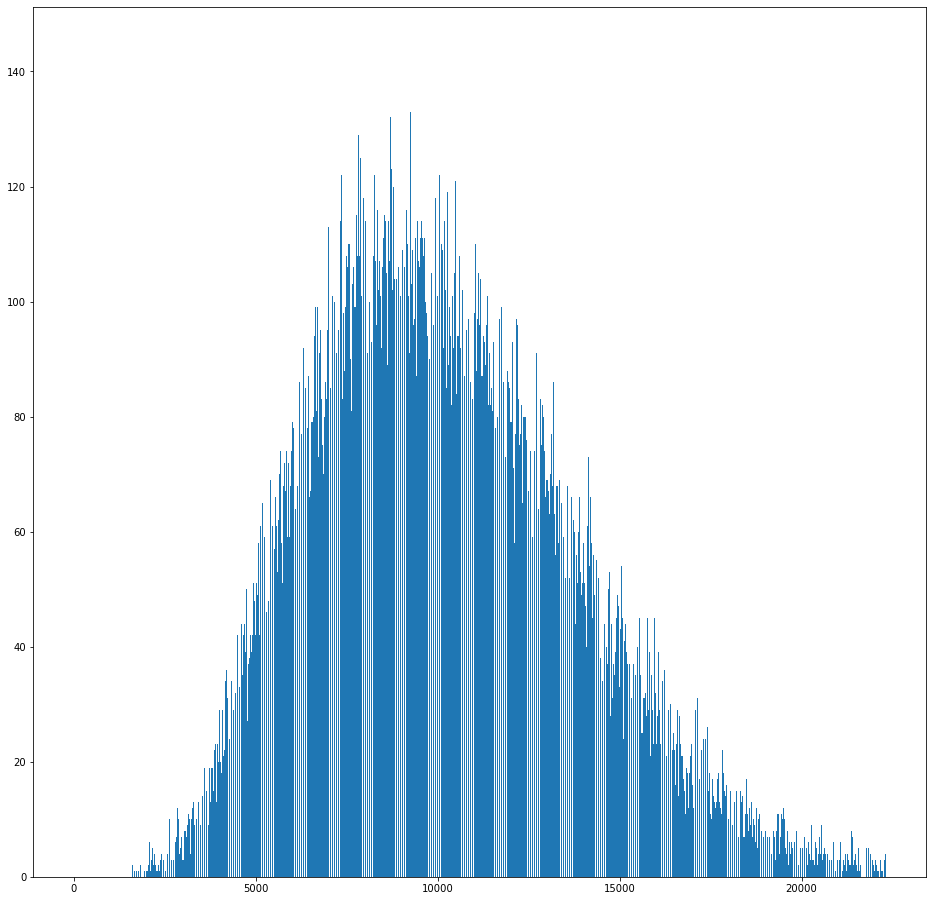

In [21]:
plt.figure(figsize=(16,16))

col = 'goldEarned'
d = data[col]
d_len = len(d.unique())
d_num = [0 for i in range(d_len+1)]

for i in range(d_len+1):
  d_num[i]=len(d[d==i])

num = range(d_len+1)
plt.bar(num, d_num)

In [22]:
# 위에 그래프들을 통해서 --> 이상치 제거 기준을 세울 수 있다
# level : 하위 0.3퍼 제거
# 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled' : 상위 0.3퍼 제거
# 'goldEarned', 'totalDamageDealtToChampions', 'gameLength' : 하위, 상위 0.3퍼 제거

In [23]:
processed_data = data

# 하위 0.3퍼, 상위 0.3퍼 데이터를 제거한다
for col in want_data:
    minimum = data[col].quantile(0.003)
    maximum = data[col].quantile(0.997)
    if col == 'level':
        processed_data = processed_data[data[col] > minimum]
    
    elif col in ['minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']:
        processed_data = processed_data[data[col] < maximum]
    
    else:
         processed_data = processed_data[processed_data[col] < maximum]
         processed_data = processed_data[processed_data[col] > minimum]

        
# processed_data : 이상치가 제거된 데이터 
processed_data

<ipython-input-23-ff54c3f57599>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-23-ff54c3f57599>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-23-ff54c3f57599>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-23-ff54c3f57599>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-23-ff54c3f57599>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-23-ff54c3f57599>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum

,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,10,15,4,1,5,5,1,1,6083,5590,972
1,8,7,1,3,3,6,3,3,4118,3827,972
2,11,100,5,1,5,7,4,5,6769,9467,972
3,11,115,8,2,1,5,1,0,7972,10963,972
4,10,110,3,2,9,5,1,2,7552,6465,972
...,...,...,...,...,...,...,...,...,...,...,...
999995,15,29,1,11,7,29,4,7,8451,10019,2379
999996,18,251,10,6,3,8,0,1,18291,37581,2379
999997,17,40,5,5,22,13,3,2,12986,20994,2379
999998,17,260,6,5,3,11,1,4,15674,37078,2379


In [24]:
# print(processed_data['totalDamageDealtToChampions'].quantile(0.995))
# print(data['totalDamageDealtToChampions'].quantile(0.995))

In [25]:
# 새로운 DataFrame 생성 후, 각 데이터들을 합쳐나간다. (분당 ~ 으로 계산)

df = pd.DataFrame()
for col in want_data:
    smalldf = pd.DataFrame(round((processed_data[col]*60) / (processed_data['gameLength']), 3), columns = [col])
    df = pd.concat([df, smalldf], axis = 1)
df = df[['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced',
             'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions']]
df.columns = dataindex
per_minute_data = pd.concat([df, mydata])

In [26]:
# 분당 데이터
per_minute_data

,Level,CS,Kill,Death,Assist,wardPlaced,visionwardPlaced,wardkilled,Gold,Damage
0,0.617,0.926,0.247,0.062,0.309,0.309,0.062,0.062,375.494,345.062
1,0.494,0.432,0.062,0.185,0.185,0.370,0.185,0.185,254.198,236.235
2,0.679,6.173,0.309,0.062,0.309,0.432,0.247,0.309,417.840,584.383
3,0.679,7.099,0.494,0.123,0.062,0.309,0.062,0.000,492.099,676.728
4,0.617,6.790,0.185,0.123,0.556,0.309,0.062,0.123,466.173,399.074
...,...,...,...,...,...,...,...,...,...,...
999996,0.454,6.330,0.252,0.151,0.076,0.202,0.000,0.025,461.311,947.818
999997,0.429,1.009,0.126,0.126,0.555,0.328,0.076,0.050,327.516,529.483
999998,0.429,6.557,0.151,0.126,0.076,0.277,0.025,0.101,395.309,935.132
999999,0.454,5.927,0.076,0.151,0.126,0.378,0.050,0.050,360.757,962.951


In [27]:
# 데이터를 rank함수를 통해 상위 %로 바꾼다 
rank_data = per_minute_data.rank(ascending = False, pct = True)
rank_data

,Level,CS,Kill,Death,Assist,wardPlaced,visionwardPlaced,wardkilled,Gold,Damage
0,0.074054,0.839727,0.319929,0.915227,0.324747,0.430378,0.497320,0.567403,0.459444,0.769887
1,0.525501,0.955023,0.826060,0.545169,0.617958,0.279711,0.122213,0.147762,0.919839,0.908269
2,0.020841,0.230407,0.211146,0.915227,0.324747,0.206246,0.054606,0.027732,0.290153,0.410220
3,0.020841,0.091919,0.050428,0.766356,0.903090,0.430378,0.497320,0.899078,0.094686,0.292750
4,0.074054,0.130737,0.465379,0.766356,0.059218,0.430378,0.497320,0.305597,0.146419,0.690214
...,...,...,...,...,...,...,...,...,...,...
999996,0.758653,0.202925,0.308945,0.666238,0.877125,0.748339,0.855307,0.794486,0.158064,0.087254
999997,0.875232,0.815245,0.632270,0.755440,0.059686,0.369512,0.431414,0.620910,0.666975,0.489832
999998,0.875232,0.165458,0.554640,0.755440,0.877125,0.535303,0.705410,0.381538,0.376222,0.092897
999999,0.758653,0.274290,0.783087,0.666238,0.768531,0.266215,0.545528,0.620910,0.522847,0.081023


In [31]:
# 나의 데이터만을 추출한다.

my_rank_data = rank_data[rank_data.index == 'me']
my_rank_data = round(my_rank_data, 3)
my_rank_data *= 100

In [33]:
# 이상치 제거 후 내가 상위 몇퍼인가 결과
my_rank_data

,Level,CS,Kill,Death,Assist,wardPlaced,visionwardPlaced,wardkilled,Gold,Damage
me,46.7,37.2,30.1,54.5,25.0,39.7,12.2,22.0,27.1,26.4


In [45]:
# # 이상치 제거 전 my_rank_data를 확인하는 코드
# data = pd.read_csv("C:/Users/Brena-30/Downloads/[opgg데이터분석가]/BIPA_data.csv", index_col = 0)
# want_data = ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced',
#              'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']
# data = data[want_data]

# df = pd.DataFrame()
# for col in want_data:
#     smalldf = pd.DataFrame(round((data[col]*60) / (data['gameLength']), 3), columns = [col])
#     df = pd.concat([df, smalldf], axis = 1)
# df = df[['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced',
#              'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions']]
# df.columns = dataindex
# per_minute_data = pd.concat([df, mydata])
# rank_data = per_minute_data.rank(ascending = False, pct = True)
# my_rank_data = rank_data[rank_data.index == 'me']
# my_rank_data = round(my_rank_data, 3)
# my_rank_data *= 100
# my_rank_data

,Level,CS,Kill,Death,Assist,wardPlaced,visionwardPlaced,wardkilled,Gold,Damage
me,46.5,36.2,29.9,53.9,24.9,39.4,12.6,22.2,26.8,26.3


In [46]:
processed_data.describe()

,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
count,952101.000000,952101.000000,952101.000000,952101.000000,952101.000000,952101.000000,952101.00000,952101.000000,952101.000000,952101.000000,952101.000000
mean,13.493728,106.095466,5.528142,5.567477,7.212482,9.599392,2.22264,2.686818,10164.282306,15782.271410,1633.905581
std,2.543319,71.807535,4.307676,3.083222,5.114994,7.560712,2.39970,2.627681,3474.077057,9505.488428,393.446198
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2824.000000,1096.000000,633.000000
25%,12.000000,33.000000,2.000000,3.000000,3.000000,5.000000,0.00000,1.000000,7555.000000,8576.000000,1342.000000
50%,14.000000,112.000000,5.000000,5.000000,6.000000,8.000000,2.00000,2.000000,9826.000000,13833.000000,1625.000000
75%,15.000000,163.000000,8.000000,8.000000,10.000000,11.000000,3.00000,4.000000,12457.000000,20934.000000,1901.000000
max,18.000000,298.000000,23.000000,15.000000,27.000000,50.000000,14.00000,15.000000,22195.000000,59249.000000,2885.000000


In [47]:
data.describe()

,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,13.346938,104.515443,5.524811,5.541644,7.233780,9.739892,2.26721,2.729932,10105.192982,15822.070128,1623.763130
std,2.938669,73.523437,4.540394,3.221281,5.391585,8.343522,2.64785,2.825078,3797.587118,10313.000453,445.475854
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,664.000000,0.000000,190.000000
25%,12.000000,32.000000,2.000000,3.000000,3.000000,5.000000,0.00000,1.000000,7442.000000,8305.000000,1329.000000
50%,14.000000,108.000000,4.000000,5.000000,6.000000,7.000000,2.00000,2.000000,9797.000000,13709.000000,1625.000000
75%,15.000000,163.000000,8.000000,8.000000,10.000000,11.000000,3.00000,4.000000,12504.000000,21045.000000,1915.000000
max,18.000000,511.000000,52.000000,34.000000,46.000000,226.000000,205.00000,56.000000,35836.000000,117810.000000,4242.000000
